## Import Libraries and data

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [4]:
iris.set_index(['Id'],inplace=True)

## Checking Coorelation

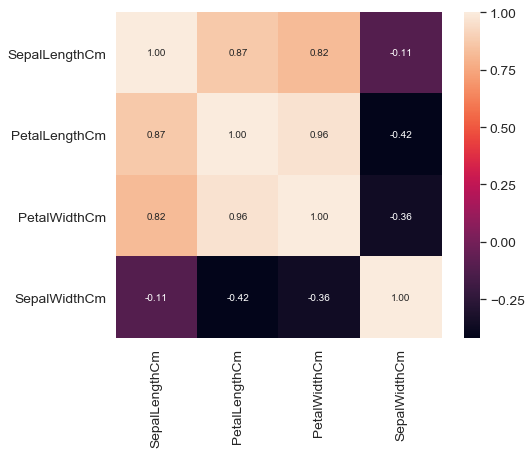

In [5]:
plt.figure(figsize=(8,6))
corrmat = iris.corr()
k = len(iris.columns)
cols = corrmat.nlargest(k, 'SepalLengthCm')['SepalLengthCm'].index
cm = np.corrcoef(iris[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='0.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

## Train Test Split

In [6]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
y = iris.iloc[:, 4:].values
X = iris.iloc[:, 0:4].values

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

## Scalling and Standardization

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## K-Nearest Neighbours Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

## Prediction and Evaluation

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 9  0  0]
 [ 0 10  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        11

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Detection of Optimal Values for K Neighbours

In [27]:
error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversi

Text(0, 0.5, 'Mean Error')

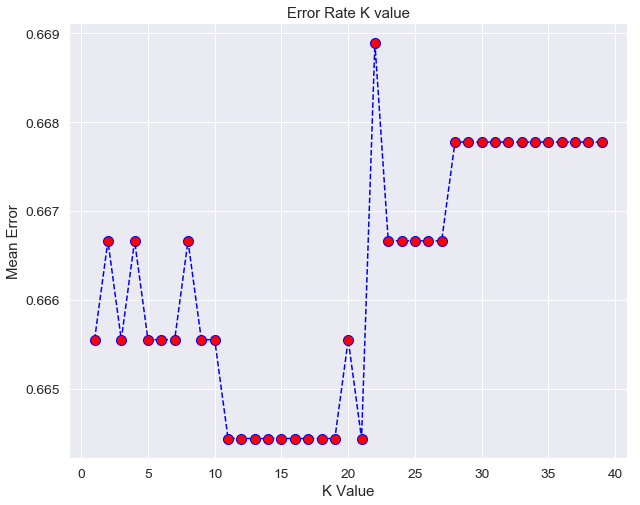

In [28]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error,color='blue',linestyle='--',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [29]:
prediction_datasets = classifier.predict(scaler.transform(X))
prediction_datasets

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [30]:
y.shape

(150, 1)

In [31]:
iris['Predict_data'] = prediction_datasets

In [32]:
iris.head(20)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predict_data
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa,Iris-setosa


In [23]:
iris.to_csv('Iris_Predicted.csv')